In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style


class K_means:
    
    def __init__(self, k=3, tolerance=0.0001, max_iter=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
        
    def euclidean(self, feature_one, feature_two):
        distance = 0
        
        if (len(feature_one) != len(feature_two)):
            return -1
            
        for i in range(len(feature_one)):
            distance += (feature_one[i] - feature_two[i]) ** 2
        
        ed = np.sqrt(distance)
        return ed
        
    def fit(self, data):
        self.centers = {}
        
        # Set the centroids to be the first numbers in the data
        for i in range(self.k):
            self.centers[i] = data[i]
            
        # Start iteration
        for i in range(self.max_iter):
            self.classes = {}
            
            # Create list for every centroid
            for i in range(self.k):
                self.classes[i] = []
                
            # Find the distance between a point and cluster, then choose the nearest centroid
            for features in data:
                distances = [self.euclidean(features, self.centers[center]) for center in self.centers]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                
            previous = dict(self.centers)
            
            # Average cluster datapoints for recalculations
            for classification in self.classes:
                self.centers[classification] = np.average(self.classes[classification], axis = 0)
            
            isOptimal = True
            
            for center in self.centers:
                original = previous[center]
                current = self.centers[center]
                if np.sum( (current - original) / original * 100.0) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal:
                break
                
        def predict(self, data):
            distances = [self.euclidean(data, self.centers[center]) for center in centers]
            classification = distances.index(min(distances))
            return classification

Final Centroids: [3.6666666666666665, 9.0]
Final Centroids: [7.0, 4.333333333333333]
Final Centroids: [1.5, 3.5]


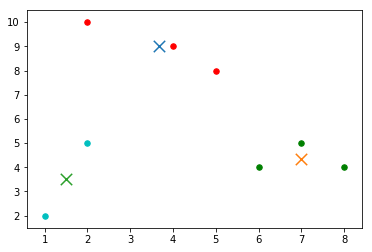

In [7]:

def main():
    x, y = make_blobs(n_samples=100, centers=5, n_features=2, random_state=1)
    data = [[2, 10], [5, 8], [1, 2], [2, 5], [7, 5], [6, 4], [8, 4], [4, 9]]
    km = K_means(k=3)
    km.fit(data)
    
    colors = 10*["r", "g", "c", "b", "k"]

    for center in km.centers:
        plt.scatter(km.centers[center][0], km.centers[center][1], s = 130, marker = "x")
        print('Final Centroids: [{}, {}]'.format(km.centers[center][0], km.centers[center][1]))

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    
    plt.show()


if __name__ == "__main__":
    main()